In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree, metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# 1. First steps

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
ss = pd.read_csv('sample_submission.csv', parse_dates=True)

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
for col in train.select_dtypes('O').columns:
    print('Unique values in {} column : {}'.format(col,train[col].unique()))

Unique values in MSZoning column : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in Street column : ['Pave' 'Grvl']
Unique values in Alley column : [nan 'Grvl' 'Pave']
Unique values in LotShape column : ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in LandContour column : ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in Utilities column : ['AllPub' 'NoSeWa']
Unique values in LotConfig column : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in LandSlope column : ['Gtl' 'Mod' 'Sev']
Unique values in Neighborhood column : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values in Condition1 column : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values in Condition2 column : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values in BldgType col

In [10]:
train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [11]:
train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [12]:
corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)[1:20].to_frame()

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


In [13]:
train['LotArea'].mean()/train['LotFrontage'].mean()

150.13325242734254

In [14]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

# 2. Cleaning data

First lets see the distribution of **SalePrice**

<AxesSubplot:xlabel='Sale Price', ylabel='Count'>

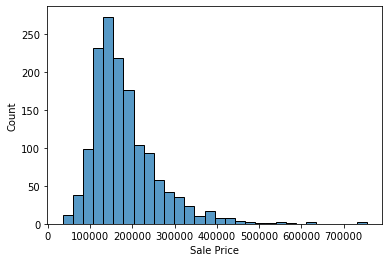

In [15]:
pl = pd.DataFrame()
pl['Sale Price'] = train['SalePrice']
pl['Log Sale Price'] = np.log1p(train['SalePrice'])
sns.histplot(data=pl, x="Sale Price", bins=30)

<AxesSubplot:xlabel='Log Sale Price', ylabel='Count'>

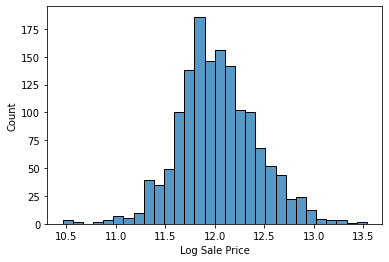

In [16]:
sns.histplot(data=pl, x="Log Sale Price", bins=30)

- Using logarithms helps us get a normal distribution, which can help detect outliers.
- In this data, we have a right-skewed distribution in which most sales are between 0 and 340K.

In [17]:
Y_train = train['SalePrice']
del train['SalePrice']

#Converting the saleprice with Logarithms to overcome the high skewness and the outliers
Y_train = np.log1p(Y_train) 

full_df = pd.concat([train.iloc[:,1:], test.iloc[:,1:]])
ntrain = len(train)
ntest = len(test)

In [18]:
full_df.shape

(2919, 79)

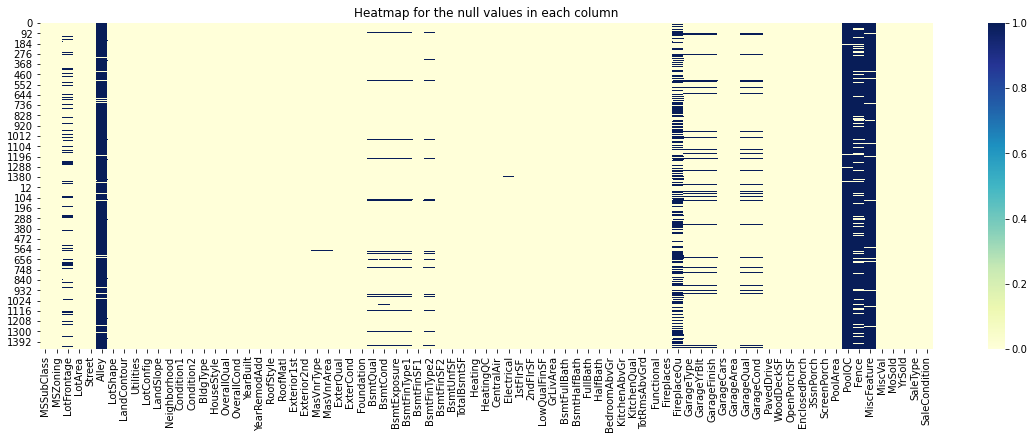

In [19]:
plt.figure(figsize=(20,6))
plt.title('Heatmap for the null values in each column')
sns.heatmap(full_df.isnull(),cmap="YlGnBu");

**MiscFeature, Fence, PoolQC, FireplaceQu, Alley** have a lot of missing values in test data. We can get rid of these signs

In [20]:
full_df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Utilities'], inplace=True)

Let's take a closer look at the rest of the missing data in the other features

- **LotFrontage** - Linear feet of street connected to property (LotArea/150=)
- **Exterior1st** and **Exterior2nd** - Exterior covering on house (has other)
- **MasVnrType** and **MasVnrArea** - Masonry veneer area and it's type
- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2** - Basemen features
- **GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond** - Garage features

In [21]:
#Start with numerical columns
num_col_na = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
          'BsmtFullBath','MasVnrArea','BsmtHalfBath','BsmtFinSF1', 
          'BsmtFinSF2', 'BsmtUnfSF','GarageYrBlt','GarageArea', 'GarageCars']
for col in num_col_na:
    full_df[col].fillna(0, inplace=True)

In [22]:
#Let's fill some categorical columns
cat_col_na = ['MasVnrType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType',
             'GarageFinish','GarageType', 'GarageCond', 'GarageQual']

for col in cat_col_na:
    full_df[col].fillna('NA', inplace=True)
    
#Let's finish filling last categorical columns
full_df['Functional'].fillna('Typ' ,inplace=True)
full_df['Electrical'].fillna('SBrkr' ,inplace=True)
full_df['SaleType'].fillna('Oth' ,inplace=True)  
full_df['KitchenQual'].fillna('TA' ,inplace=True)
full_df['SaleType'].fillna('Oth' ,inplace=True)      
full_df['Exterior1st'].fillna('Other' ,inplace=True) 
full_df['Exterior2nd'].fillna('Other' ,inplace=True)

full_df['LotFrontage'].fillna(full_df['LotArea']/150, inplace=True)

full_df['MSZoning'] = full_df['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [23]:
full_df.isnull().sum().max()

0

In [24]:
full_df.shape
#Make sure we haven't lost a single row in the data

(2919, 73)

**Gotcha!**

In [25]:
#Let's add the new feature:
full_df['TotalSF'] = full_df['TotalBsmtSF'] + full_df['1stFlrSF'] + full_df['2ndFlrSF']

# 3. Preparing the data for ML

We need to encode categorical features with encoder. I had a choice between **LabelEncoder()** and **pd.get_dummies()**

And choose first one

In [26]:
#First of all make a list of categorical features of full data
cat_features = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour','LotConfig', 'LandSlope', 'Neighborhood',
            'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 
            'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','TotRmsAbvGrd', 'Functional', 
            'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
            'MoSold', 'SaleType', 'SaleCondition','OverallCond', 'YrSold']

In [27]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
full_df[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2919 non-null   int64 
 1   MSZoning       2919 non-null   object
 2   Street         2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   LotConfig      2919 non-null   object
 6   LandSlope      2919 non-null   object
 7   Neighborhood   2919 non-null   object
 8   Condition1     2919 non-null   object
 9   Condition2     2919 non-null   object
 10  BldgType       2919 non-null   object
 11  HouseStyle     2919 non-null   object
 12  RoofStyle      2919 non-null   object
 13  RoofMatl       2919 non-null   object
 14  Exterior1st    2919 non-null   object
 15  Exterior2nd    2919 non-null   object
 16  MasVnrType     2919 non-null   object
 17  ExterQual      2919 non-null   object
 18  ExterCond      2919 non-null

In [29]:
# Convert YrSold, MoSold, MSSubClass, and OverallCond columns from numeric to string

full_df['YrSold'] = full_df['YrSold'].astype(str)
full_df['MoSold'] = full_df['MoSold'].astype(str)
full_df['MSSubClass'] = full_df['MSSubClass'].apply(str)
full_df['OverallCond'] = full_df['OverallCond'].astype(str)
full_df['TotRmsAbvGrd'] = full_df['TotRmsAbvGrd'].astype(str)

In [30]:
full_df[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2919 non-null   object
 1   MSZoning       2919 non-null   object
 2   Street         2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   LotConfig      2919 non-null   object
 6   LandSlope      2919 non-null   object
 7   Neighborhood   2919 non-null   object
 8   Condition1     2919 non-null   object
 9   Condition2     2919 non-null   object
 10  BldgType       2919 non-null   object
 11  HouseStyle     2919 non-null   object
 12  RoofStyle      2919 non-null   object
 13  RoofMatl       2919 non-null   object
 14  Exterior1st    2919 non-null   object
 15  Exterior2nd    2919 non-null   object
 16  MasVnrType     2919 non-null   object
 17  ExterQual      2919 non-null   object
 18  ExterCond      2919 non-null

In [31]:
# Apply le on categorical feature columns
for c in cat_features:
    lbl = LabelEncoder() 
    full_df[c] = lbl.fit_transform(full_df[c])
full_df[cat_features].head(10)

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition,OverallCond,YrSold
0,10,3,1,3,3,4,0,5,2,2,...,1,2,5,5,2,4,8,4,4,2
1,5,3,1,3,3,2,0,24,1,2,...,1,2,5,5,2,7,8,4,7,1
2,10,3,1,0,3,4,0,5,2,2,...,1,2,5,5,2,11,8,4,4,2
3,11,3,1,0,3,0,0,6,2,2,...,5,3,5,5,2,4,8,0,4,0
4,10,3,1,0,3,2,0,15,2,2,...,1,2,5,5,2,3,8,4,4,2
5,9,3,1,0,3,4,0,11,2,2,...,1,3,5,5,2,1,8,4,4,3
6,5,3,1,3,3,4,0,21,2,2,...,1,2,5,5,2,10,8,4,4,1
7,10,3,1,0,3,0,0,14,4,2,...,1,2,5,5,2,2,8,4,5,3
8,9,4,1,3,3,4,0,17,0,2,...,5,3,1,5,2,6,8,0,4,2
9,4,3,1,3,3,0,0,3,0,0,...,1,2,2,5,2,0,8,4,5,2


In [32]:
num_features = ['LotFrontage', 'LotArea', 'YearBuilt','YearRemodAdd', 'MasVnrArea', 
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
            '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [33]:
#Normalize our numeric data
full_df[num_features] = full_df[num_features].apply(lambda x:np.log1p(x))

In [34]:
#Make sure we have done good work
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int32  
 1   MSZoning       2919 non-null   int32  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   float64
 4   Street         2919 non-null   int32  
 5   LotShape       2919 non-null   int32  
 6   LandContour    2919 non-null   int32  
 7   LotConfig      2919 non-null   int32  
 8   LandSlope      2919 non-null   int32  
 9   Neighborhood   2919 non-null   int32  
 10  Condition1     2919 non-null   int32  
 11  Condition2     2919 non-null   int32  
 12  BldgType       2919 non-null   int32  
 13  HouseStyle     2919 non-null   int32  
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int32  
 16  YearBuilt      2919 non-null   float64
 17  YearRemodAdd   2919 non-null   float64
 18  RoofStyl

**Back to train/test datasets**

In [35]:
train_set = full_df[:ntrain].reset_index().drop('index',axis=1)
test_set = full_df[ntrain:].reset_index().drop('index',axis=1)

# 4. Machine learning

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train_set, Y_train, test_size=0.2, random_state=42)

In [37]:
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred1 = l_r.predict(X_test)

In [39]:
l_r.score(X_test,y_test)

0.8832277563994673

In [40]:
el_net = ElasticNetCV(alphas = [1, 0.1, 0.001, 0.0005], max_iter=10000, n_jobs=-1, positive=True, l1_ratio=0.85)

In [41]:
el_net.fit(X_train, y_train)

y_pred2 = el_net.predict(X_train)

In [42]:
el_net.score(X_test, y_test)

0.8826996596016705

# Conclusion

I will choose **LinearRegression** as the best model.

In [43]:
print("LinearRegression gives us {:.1%} accuracy".format(l_r.score(X_test,y_test)))

LinearRegression gives us 88.3% accuracy


<AxesSubplot:>

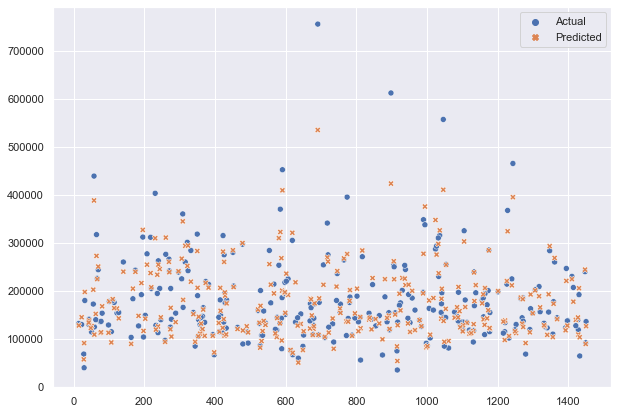

In [44]:
data = pd.DataFrame({"Actual":np.expm1(y_test), "Predicted" : np.expm1(l_r.predict(X_test))})
sns.set(rc={'figure.figsize':(10,7)})
sns.scatterplot(data=data)

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 0.10220300790331041
Mean Squared Error: 0.02179098381805459
Root Mean Squared Error: 0.14761769479996154


In [46]:
ss["SalePrice"] = np.expm1(l_r.predict(test_set))
ss.to_csv("submission.csv", index=False)